In [ ]:
"""
    ECG T-wave detection using 1-D CNN UNET

    1) T-wave mask data generation using HR checking with QRS-wave
        
    2) loading ECG data and T-wave mask data simultaneously

    3) definitions of models: CNN U-net

    4) compiling the T-wave segmentation model based on (3), training, and validation

    Tensorflow-Keras 2.3.0

    Author: Joonnyong Lee, PhD (CEO, Mellowing Factory Co., Ltd.)
    Date: 2020-8-31
"""

In [3]:
"""Create a folder called '20200917_KOHI_CNN_ECGT-master' in your Google Drive and upload this file and the unzipped ECG data file"""

""" 런타임 > 런타임 유형 변경 (GPU) """
""" Install """
!pip install heartpy

# load the required libraries
from random import shuffle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
import heartpy as hp
import scipy

from google.colab import drive
drive.mount('/content/gdrive')

# model parameters
sampling_frequency = 50
timesteps = sampling_frequency*10
kernel_size = 3

# set filewriter path
FILEWRITER_PATH = '/content/gdrive/My Drive/20200917_KOHI_CNN_ECGT-master/CNN_ECGT_' + str(timesteps) + 'timesteps_tensorboard'
if not os.path.isdir(FILEWRITER_PATH):
    os.makedirs(FILEWRITER_PATH)
CHECKPOINT_PATH = '/content/gdrive/My Drive/20200917_KOHI_CNN_ECGT-master/CNN_ECGT_' + str(timesteps) + 'timesteps_tensorboard/checkpoints'
if not os.path.isdir(CHECKPOINT_PATH):
    os.makedirs(CHECKPOINT_PATH)

C:\Users\Joon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Joon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Joon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Joon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [6]:
# -------------------------------------------- ECG T-wave mask generation -------------------------------------------- #

# set this to the path of your data file
ECG_data_path = glob.glob('/content/gdrive/My Drive/20200917_KOHI_CNN_ECGT-master/ECG_files/*ECG2.txt')

def mask_generation(data_path):
    
    print(data_path)
    
    # load the patient ECG data, use np.loadtxt
    ECG_data = ????
    
    # varibles for counting errors (exceptions)
    exception_R = 0
    exception_S = 0
    exception_T = 0
    
    # for-loop: set 10sec data for pre-processing
    for datanum in range(??????):
        
        # variables for 10 sec data
        ECG_10sec = ECG_data[datanum:datanum+timesteps].copy()
        # upsample 10 sec data for R-peak detection purpoes
        ECG_10sec_200Hz = scipy.signal.resample(ECG_10sec, len(ECG_10sec) * 4)
        
        # use try/except to find R-peaks using 'heartpy' library
        try:
            #  use 'heartpy' library
            working_data, m = hp.process(ECG_10sec_200Hz, sampling_frequency*4)
            R_wave_200Hz = np.asarray(working_data['peaklist'])
            # find R-peak location in 50Hz data
            R_wave = R_wave_200Hz / 4
            # set R-peak locations to integer data type for indexing
            R_wave = R_wave.astype(int)
            
            # set empty variables for S-wave and T-waves, use np.zeros
            S_wave = ??????
            T_wave = ??????
            
            # for-loop: find S, T waves in between R-peaks
            for RR_num in range(len(R_wave)-1):
                
                # determine the window size to look for S-wave after R-peak
                window = (R_wave[RR_num+1]-R_wave[RR_num])/5
                window = window.astype(int)
                # use try/except to find S-waves using np.argmin
                try:
                    S_wave[RR_num] = np.argmin(ECG_10sec[R_wave[RR_num]:R_wave[RR_num]+window])
                    S_wave[RR_num] = S_wave[RR_num] + R_wave[RR_num]
                except:
                    exception_S += 1
                
                # determine the window size to look for T-wave after S-wave
                window2 = ???????
                window2 = window2.astype(int)
                # use try/except to find T-waves using np.argmax
                try:
                    T_wave[RR_num] = np.argmax(??????????)
                    T_wave[RR_num] = ????????
                except:
                    exception_T += 1
            
            # remove the last R-wave data
            R_wave = R_wave[:-1]
            # set T-wave values to integer data type for indexing
            T_wave = T_wave.astype(int)
            
            # take the difference between consecutive R-peaks and T-waves to find "HR", use np.diff
            R_diff = ?????
            T_diff = ?????
            # check if the T-waves detected in the 10s ECG meet the requirements
            signal_okay = 0
            for peaknum in range(len(R_diff)):
                # requirements: R-peak HR and T-wave HR are close, R-peak HR is within 30 ~ 180BPM
                if ?????????? and ?????????? and ?????????:
                    signal_okay += 1
            
            # if all of the T-waves found in the 10sec meet the requirements, then save the T-wave masks
            if signal_okay == len(R_diff):
                
                # create variables of lenght 10s, with values 0, use np.zeros
                R_mask = ?????????
                T_mask = ?????????
                
                # set the values of 1 for where the T-waves were detected
                ?????????????????
                
                # set file name to save the 10s ECG data and the corresponding mask data
                name = data_path
                name = name[:-4]
                
                # save the 10s ECG data
                new_name = name + '_10sec_set.txt'
                file = open(new_name, 'a')
                for i in range(500):
                    file.write(str(ECG_10sec[i]) + ' ')
                file.write("\n")
                
                # save the 10s R-peak mask data
                new_name2 = name + '_10sec_set_R_mask.txt'
                file = open(new_name2, 'a')
                for i in range(500):
                    file.write(str(R_mask[i]) + ' ')
                file.write("\n")
                
                # save the 10s T-wave mask data
                new_name3 = name + '_10sec_set_T_mask.txt'
                file = open(new_name3, 'a')
                for i in range(500):
                    file.write(str(T_mask[i]) + ' ')
                file.write("\n")
        
        except:
            exception_R += 1
    
    return 


# for-loop through the raw ECG files, and generate T-wave masks for each of them
for filenum in range(len(ECG_data_path)):
    mask_generation(ECG_data_path[filenum])   


C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00031_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00140_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00175_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00263_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00427_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00441_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00513_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00530_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00562_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00876_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\00937_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\01006_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\01102_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\01200_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/ECG_files\01303_ECG2.txt
C:/Users/Joon/Desktop/ECG_HR_detection/E

(457, 500)
(321, 500)
(332, 500)
(279, 500)
(33, 500)
(658, 500)
(285, 500)
(23, 500)
(4, 500)
(3, 500)
(72, 500)
(612, 500)
(264, 500)
(327, 500)
(635, 500)
(46, 500)
(556, 500)
(638, 500)
(2, 500)
(272, 500)
(2, 500)
(123, 500)
(537, 500)
(544, 500)
(408, 500)
(17, 500)
(3, 500)
(688, 500)
(289, 500)
(31, 500)
(281, 500)
(202, 500)
(206, 500)
(2, 500)
(553, 500)
(2, 500)
(526, 500)
(541, 500)
(338, 500)


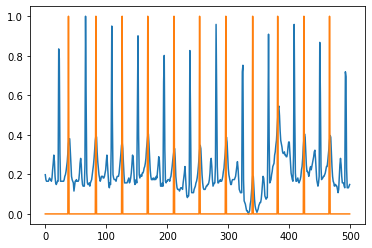

In [4]:
# -------------------------------------------- data loading and pre-processing -------------------------------------------- #

ECG_10sec_list = glob.glob('/content/gdrive/My Drive/20200917_KOHI_CNN_ECGT-master/ECG_files/*ECG2_10sec_set.txt')
ECG_10sec_T_mask_list = glob.glob('/content/gdrive/My Drive/20200917_KOHI_CNN_ECGT-master/ECG_files/*ECG2_10sec_set_T_mask.txt')

# d = list(zip(ECG_10sec_list, ECG_10sec_T_mask_list))
# shuffle(d)
# ECG_10sec_list, ECG_10sec_T_mask_list = zip(*d)

train_ECG_list = []
train_mask_list = []
val_ECG_list = []
val_mask_list = []

for filenum in range(len(ECG_10sec_list)):
    ECG_data = np.loadtxt(ECG_10sec_list[filenum])
    ECG_mask_data = np.loadtxt(ECG_10sec_T_mask_list[filenum])
    
    if len(ECG_data) != timesteps:
        for datanum in range(len(ECG_data)):
            a = ?????????

            b = ?????????

            if filenum < 0.8 * len(ECG_10sec_list):
                train_ECG_list.append(????)
                train_mask_list.append(????)
            else:
                val_ECG_list.append(????)
                val_mask_list.append(????)
                
# plot the last data
plt.figure(figsize=(14,4))
plt.plot(a)
plt.plot(b)
plt.show()

# conver the lists into arrays
train_ECG = np.asarray(train_ECG_list)
train_mask = np.asarray(train_mask_list)
val_ECG = np.asarray(val_ECG_list)
val_mask = np.asarray(val_mask_list)

# need to reshape the data into 3 dimensions (batch_size, timesteps, channel_number) for Keras convolution 
train_ECG = np.reshape(train_ECG, [len(train_ECG), timesteps, 1])
train_mask = np.reshape(train_mask, [len(train_mask), timesteps, 1])
val_ECG = np.reshape(val_ECG, [len(val_ECG), timesteps, 1])
val_mask = np.reshape(val_mask, [len(val_mask), timesteps, 1])

In [5]:
# ------------------------------------------ deep learning model definition ------------------------------------------ #

def CNN():

    model_inputs = tf.keras.Input(shape=(int(timesteps), 1))
    
    # first conv-batchnorm-maxpool layer
    x = tf.keras.layers.Conv1D(filters=2, kernel_size=3, padding='same',input_shape=(int(timesteps), 1))(model_inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    out1 = x
    x = tf.keras.layers.MaxPooling1D(2, 2, padding='same')(x)
    
    # second conv-batchnorm-maxpool layer
    x = ??????
    x = ??????
    x = ??????
    out2 = x
    x = ????
    
    # third conv-batchnorm-maxpool layer
    x = ??????
    x = ??????
    x = ??????
    out3 = x
    x = ?????
    
    # fourth conv-batchnorm layer
    x = ??????
    x = ??????
    x = ??????
    
    # fifth upsample-concat-conv-batchnorm layer
    x = ??????
    x = ??????
    x = ??????
    x = ??????
    x = ??????
    
    # sixth upsample-concat-conv-batchnorm layer
    x = ??????
    x = ??????
    x = ??????
    x = ??????
    x = ??????

        # seventh upsample-concat-conv-batchnorm layer
    x = tf.keras.layers.UpSampling1D(2)(x)
    x = tf.keras.layers.Concatenate()([x, out1])
    x = tf.keras.layers.Conv1D(filters=2, kernel_size=kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # last convolution layer
    out = tf.keras.layers.Conv1D(filters=1, kernel_size=kernel_size, activation='sigmoid', padding='same')(x)

    model = tf.keras.Model(inputs=model_inputs, outputs=out)

    return model

Instructions for updating:
Colocations handled automatically by placer.
Train on 8742 samples, validate on 2370 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2000

Epoch 00001: val_loss improved from inf to 0.69264, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
 - 9s - loss: 0.6723 - val_loss: 0.6926
Epoch 2/2000

Epoch 00002: val_loss improved from 0.69264 to 0.69209, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.6664 - val_loss: 0.6921
Epoch 3/2000

Epoch 00003: val_loss improved from 0.69209 to 0.69165, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.6605 - val_loss: 0.6916
Epoch 4/2000

E

 - 0s - loss: 0.6135 - val_loss: 0.6871
Epoch 14/2000

Epoch 00014: val_loss improved from 0.68709 to 0.68662, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.6100 - val_loss: 0.6866
Epoch 15/2000

Epoch 00015: val_loss improved from 0.68662 to 0.68616, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.6065 - val_loss: 0.6862
Epoch 16/2000

Epoch 00016: val_loss improved from 0.68616 to 0.68571, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.6031 - val_loss: 0.6857
Epoch 17/2000

Epoch 00017: val_loss improved from 0.68571 to 0.68527, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5998 - val_loss: 0.6853
Epoch 18/2000

Epoch 00018: val_loss

 - 0s - loss: 0.5650 - val_loss: 0.6798
Epoch 29/2000

Epoch 00029: val_loss improved from 0.67979 to 0.67920, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5619 - val_loss: 0.6792
Epoch 30/2000

Epoch 00030: val_loss improved from 0.67920 to 0.67860, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5588 - val_loss: 0.6786
Epoch 31/2000

Epoch 00031: val_loss improved from 0.67860 to 0.67800, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5556 - val_loss: 0.6780
Epoch 32/2000

Epoch 00032: val_loss improved from 0.67800 to 0.67738, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5525 - val_loss: 0.6774
Epoch 33/2000

Epoch 00033: val_loss

 - 0s - loss: 0.5194 - val_loss: 0.6656
Epoch 44/2000

Epoch 00044: val_loss improved from 0.66558 to 0.66371, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5165 - val_loss: 0.6637
Epoch 45/2000

Epoch 00045: val_loss improved from 0.66371 to 0.66181, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5136 - val_loss: 0.6618
Epoch 46/2000

Epoch 00046: val_loss improved from 0.66181 to 0.65995, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5108 - val_loss: 0.6600
Epoch 47/2000

Epoch 00047: val_loss improved from 0.65995 to 0.65815, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.5080 - val_loss: 0.6581
Epoch 48/2000

Epoch 00048: val_loss

 - 0s - loss: 0.4800 - val_loss: 0.6345
Epoch 59/2000

Epoch 00059: val_loss improved from 0.63445 to 0.63072, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4776 - val_loss: 0.6307
Epoch 60/2000

Epoch 00060: val_loss improved from 0.63072 to 0.62669, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4754 - val_loss: 0.6267
Epoch 61/2000

Epoch 00061: val_loss improved from 0.62669 to 0.62240, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4731 - val_loss: 0.6224
Epoch 62/2000

Epoch 00062: val_loss improved from 0.62240 to 0.61787, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4709 - val_loss: 0.6179
Epoch 63/2000

Epoch 00063: val_loss

 - 0s - loss: 0.4484 - val_loss: 0.5556
Epoch 74/2000

Epoch 00074: val_loss improved from 0.55562 to 0.54909, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4464 - val_loss: 0.5491
Epoch 75/2000

Epoch 00075: val_loss improved from 0.54909 to 0.54246, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4445 - val_loss: 0.5425
Epoch 76/2000

Epoch 00076: val_loss improved from 0.54246 to 0.53574, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4427 - val_loss: 0.5357
Epoch 77/2000

Epoch 00077: val_loss improved from 0.53574 to 0.52896, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4408 - val_loss: 0.5290
Epoch 78/2000

Epoch 00078: val_loss

 - 0s - loss: 0.4212 - val_loss: 0.4669
Epoch 89/2000

Epoch 00089: val_loss improved from 0.46688 to 0.46282, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4195 - val_loss: 0.4628
Epoch 90/2000

Epoch 00090: val_loss improved from 0.46282 to 0.45899, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4178 - val_loss: 0.4590
Epoch 91/2000

Epoch 00091: val_loss improved from 0.45899 to 0.45535, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4162 - val_loss: 0.4554
Epoch 92/2000

Epoch 00092: val_loss improved from 0.45535 to 0.45189, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4145 - val_loss: 0.4519
Epoch 93/2000

Epoch 00093: val_loss

 - 0s - loss: 0.3971 - val_loss: 0.4202
Epoch 104/2000

Epoch 00104: val_loss improved from 0.42017 to 0.41767, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3955 - val_loss: 0.4177
Epoch 105/2000

Epoch 00105: val_loss improved from 0.41767 to 0.41522, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3940 - val_loss: 0.4152
Epoch 106/2000

Epoch 00106: val_loss improved from 0.41522 to 0.41282, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3926 - val_loss: 0.4128
Epoch 107/2000

Epoch 00107: val_loss improved from 0.41282 to 0.41049, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3911 - val_loss: 0.4105
Epoch 108/2000

Epoch 00108: val

 - 0s - loss: 0.3756 - val_loss: 0.3882
Epoch 119/2000

Epoch 00119: val_loss improved from 0.38817 to 0.38627, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3743 - val_loss: 0.3863
Epoch 120/2000

Epoch 00120: val_loss improved from 0.38627 to 0.38438, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3730 - val_loss: 0.3844
Epoch 121/2000

Epoch 00121: val_loss improved from 0.38438 to 0.38250, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3717 - val_loss: 0.3825
Epoch 122/2000

Epoch 00122: val_loss improved from 0.38250 to 0.38063, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3704 - val_loss: 0.3806
Epoch 123/2000

Epoch 00123: val

 - 0s - loss: 0.3570 - val_loss: 0.3600
Epoch 134/2000

Epoch 00134: val_loss improved from 0.36002 to 0.35799, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3559 - val_loss: 0.3580
Epoch 135/2000

Epoch 00135: val_loss improved from 0.35799 to 0.35589, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3547 - val_loss: 0.3559
Epoch 136/2000

Epoch 00136: val_loss improved from 0.35589 to 0.35374, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3536 - val_loss: 0.3537
Epoch 137/2000

Epoch 00137: val_loss improved from 0.35374 to 0.35151, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3524 - val_loss: 0.3515
Epoch 138/2000

Epoch 00138: val

 - 0s - loss: 0.3405 - val_loss: 0.3229
Epoch 149/2000

Epoch 00149: val_loss improved from 0.32287 to 0.31999, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3395 - val_loss: 0.3200
Epoch 150/2000

Epoch 00150: val_loss improved from 0.31999 to 0.31708, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3384 - val_loss: 0.3171
Epoch 151/2000

Epoch 00151: val_loss improved from 0.31708 to 0.31416, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3374 - val_loss: 0.3142
Epoch 152/2000

Epoch 00152: val_loss improved from 0.31416 to 0.31122, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3364 - val_loss: 0.3112
Epoch 153/2000

Epoch 00153: val

 - 0s - loss: 0.3257 - val_loss: 0.2795
Epoch 164/2000

Epoch 00164: val_loss improved from 0.27946 to 0.27673, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3247 - val_loss: 0.2767
Epoch 165/2000

Epoch 00165: val_loss improved from 0.27673 to 0.27404, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3238 - val_loss: 0.2740
Epoch 166/2000

Epoch 00166: val_loss improved from 0.27404 to 0.27138, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3229 - val_loss: 0.2714
Epoch 167/2000

Epoch 00167: val_loss improved from 0.27138 to 0.26878, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3220 - val_loss: 0.2688
Epoch 168/2000

Epoch 00168: val

 - 0s - loss: 0.3120 - val_loss: 0.2451
Epoch 179/2000

Epoch 00179: val_loss improved from 0.24510 to 0.24364, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3111 - val_loss: 0.2436
Epoch 180/2000

Epoch 00180: val_loss improved from 0.24364 to 0.24240, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3102 - val_loss: 0.2424
Epoch 181/2000

Epoch 00181: val_loss improved from 0.24240 to 0.24141, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3093 - val_loss: 0.2414
Epoch 182/2000

Epoch 00182: val_loss improved from 0.24141 to 0.24072, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.3084 - val_loss: 0.2407
Epoch 183/2000

Epoch 00183: val

Epoch 234/2000

Epoch 00234: val_loss did not improve from 0.24040
 - 0s - loss: 0.2663 - val_loss: 0.2604
Epoch 235/2000

Epoch 00235: val_loss did not improve from 0.24040
 - 0s - loss: 0.2656 - val_loss: 0.2609
Epoch 236/2000

Epoch 00236: val_loss did not improve from 0.24040
 - 0s - loss: 0.2648 - val_loss: 0.2615
Epoch 237/2000

Epoch 00237: val_loss did not improve from 0.24040
 - 0s - loss: 0.2641 - val_loss: 0.2621
Epoch 238/2000

Epoch 00238: val_loss did not improve from 0.24040
 - 0s - loss: 0.2633 - val_loss: 0.2628
Epoch 239/2000

Epoch 00239: val_loss did not improve from 0.24040
 - 0s - loss: 0.2626 - val_loss: 0.2635
Epoch 240/2000

Epoch 00240: val_loss did not improve from 0.24040
 - 0s - loss: 0.2618 - val_loss: 0.2644
Epoch 241/2000

Epoch 00241: val_loss did not improve from 0.24040
 - 0s - loss: 0.2611 - val_loss: 0.2652
Epoch 242/2000

Epoch 00242: val_loss did not improve from 0.24040
 - 0s - loss: 0.2603 - val_loss: 0.2663
Epoch 243/2000

Epoch 00243: val_loss

 - 0s - loss: 0.2208 - val_loss: 0.2319
Epoch 298/2000

Epoch 00298: val_loss improved from 0.23187 to 0.22984, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2202 - val_loss: 0.2298
Epoch 299/2000

Epoch 00299: val_loss improved from 0.22984 to 0.22801, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2195 - val_loss: 0.2280
Epoch 300/2000

Epoch 00300: val_loss improved from 0.22801 to 0.22633, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2189 - val_loss: 0.2263
Epoch 301/2000

Epoch 00301: val_loss improved from 0.22633 to 0.22480, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2183 - val_loss: 0.2248
Epoch 302/2000

Epoch 00302: val

 - 0s - loss: 0.2119 - val_loss: 0.2110
Epoch 313/2000

Epoch 00313: val_loss improved from 0.21102 to 0.20985, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2113 - val_loss: 0.2099
Epoch 314/2000

Epoch 00314: val_loss improved from 0.20985 to 0.20868, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2107 - val_loss: 0.2087
Epoch 315/2000

Epoch 00315: val_loss improved from 0.20868 to 0.20752, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2102 - val_loss: 0.2075
Epoch 316/2000

Epoch 00316: val_loss improved from 0.20752 to 0.20638, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2096 - val_loss: 0.2064
Epoch 317/2000

Epoch 00317: val

 - 0s - loss: 0.2034 - val_loss: 0.1970
Epoch 328/2000

Epoch 00328: val_loss improved from 0.19695 to 0.19658, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2028 - val_loss: 0.1966
Epoch 329/2000

Epoch 00329: val_loss improved from 0.19658 to 0.19635, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2022 - val_loss: 0.1964
Epoch 330/2000

Epoch 00330: val_loss improved from 0.19635 to 0.19625, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.2016 - val_loss: 0.1963
Epoch 331/2000

Epoch 00331: val_loss did not improve from 0.19625
 - 0s - loss: 0.2010 - val_loss: 0.1963
Epoch 332/2000

Epoch 00332: val_loss did not improve from 0.19625
 - 0s - loss: 0.2004 - val_loss: 0.1964
Epoch 333/2000

Epoch 00333: val_loss did not impr

 - 0s - loss: 0.1738 - val_loss: 0.1910
Epoch 366/2000

Epoch 00366: val_loss improved from 0.19097 to 0.19044, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1732 - val_loss: 0.1904
Epoch 367/2000

Epoch 00367: val_loss improved from 0.19044 to 0.19012, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1726 - val_loss: 0.1901
Epoch 368/2000

Epoch 00368: val_loss improved from 0.19012 to 0.19001, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1719 - val_loss: 0.1900
Epoch 369/2000

Epoch 00369: val_loss did not improve from 0.19001
 - 0s - loss: 0.1714 - val_loss: 0.1901
Epoch 370/2000

Epoch 00370: val_loss did not improve from 0.19001
 - 0s - loss: 0.1708 - val_loss: 0.1904
Epoch 371/2000

Epoch 00371: val_loss did not impr

 - 0s - loss: 0.1555 - val_loss: 0.1860
Epoch 401/2000

Epoch 00401: val_loss improved from 0.18601 to 0.18551, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1550 - val_loss: 0.1855
Epoch 402/2000

Epoch 00402: val_loss improved from 0.18551 to 0.18504, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1545 - val_loss: 0.1850
Epoch 403/2000

Epoch 00403: val_loss improved from 0.18504 to 0.18458, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1541 - val_loss: 0.1846
Epoch 404/2000

Epoch 00404: val_loss improved from 0.18458 to 0.18411, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1536 - val_loss: 0.1841
Epoch 405/2000

Epoch 00405: val

 - 0s - loss: 0.1487 - val_loss: 0.1789
Epoch 416/2000

Epoch 00416: val_loss improved from 0.17888 to 0.17843, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1482 - val_loss: 0.1784
Epoch 417/2000

Epoch 00417: val_loss improved from 0.17843 to 0.17799, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1478 - val_loss: 0.1780
Epoch 418/2000

Epoch 00418: val_loss improved from 0.17799 to 0.17755, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1474 - val_loss: 0.1775
Epoch 419/2000

Epoch 00419: val_loss improved from 0.17755 to 0.17712, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1469 - val_loss: 0.1771
Epoch 420/2000

Epoch 00420: val

 - 0s - loss: 0.1424 - val_loss: 0.1712
Epoch 431/2000

Epoch 00431: val_loss improved from 0.17120 to 0.17054, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1420 - val_loss: 0.1705
Epoch 432/2000

Epoch 00432: val_loss improved from 0.17054 to 0.16986, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1416 - val_loss: 0.1699
Epoch 433/2000

Epoch 00433: val_loss improved from 0.16986 to 0.16919, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1412 - val_loss: 0.1692
Epoch 434/2000

Epoch 00434: val_loss improved from 0.16919 to 0.16852, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1408 - val_loss: 0.1685
Epoch 435/2000

Epoch 00435: val

 - 0s - loss: 0.1366 - val_loss: 0.1621
Epoch 446/2000

Epoch 00446: val_loss improved from 0.16215 to 0.16167, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1362 - val_loss: 0.1617
Epoch 447/2000

Epoch 00447: val_loss improved from 0.16167 to 0.16121, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1358 - val_loss: 0.1612
Epoch 448/2000

Epoch 00448: val_loss improved from 0.16121 to 0.16076, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1355 - val_loss: 0.1608
Epoch 449/2000

Epoch 00449: val_loss improved from 0.16076 to 0.16034, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1351 - val_loss: 0.1603
Epoch 450/2000

Epoch 00450: val

 - 0s - loss: 0.1309 - val_loss: 0.1562
Epoch 461/2000

Epoch 00461: val_loss improved from 0.15623 to 0.15586, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1306 - val_loss: 0.1559
Epoch 462/2000

Epoch 00462: val_loss improved from 0.15586 to 0.15549, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1302 - val_loss: 0.1555
Epoch 463/2000

Epoch 00463: val_loss improved from 0.15549 to 0.15513, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1298 - val_loss: 0.1551
Epoch 464/2000

Epoch 00464: val_loss improved from 0.15513 to 0.15477, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1294 - val_loss: 0.1548
Epoch 465/2000

Epoch 00465: val

 - 0s - loss: 0.1254 - val_loss: 0.1508
Epoch 476/2000

Epoch 00476: val_loss improved from 0.15075 to 0.15034, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1250 - val_loss: 0.1503
Epoch 477/2000

Epoch 00477: val_loss improved from 0.15034 to 0.14991, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1247 - val_loss: 0.1499
Epoch 478/2000

Epoch 00478: val_loss improved from 0.14991 to 0.14948, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1243 - val_loss: 0.1495
Epoch 479/2000

Epoch 00479: val_loss improved from 0.14948 to 0.14905, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1239 - val_loss: 0.1491
Epoch 480/2000

Epoch 00480: val

 - 0s - loss: 0.1201 - val_loss: 0.1444
Epoch 491/2000

Epoch 00491: val_loss improved from 0.14439 to 0.14390, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1197 - val_loss: 0.1439
Epoch 492/2000

Epoch 00492: val_loss improved from 0.14390 to 0.14339, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1194 - val_loss: 0.1434
Epoch 493/2000

Epoch 00493: val_loss improved from 0.14339 to 0.14288, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1191 - val_loss: 0.1429
Epoch 494/2000

Epoch 00494: val_loss improved from 0.14288 to 0.14235, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1187 - val_loss: 0.1424
Epoch 495/2000

Epoch 00495: val

 - 0s - loss: 0.1154 - val_loss: 0.1354
Epoch 506/2000

Epoch 00506: val_loss improved from 0.13539 to 0.13473, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1151 - val_loss: 0.1347
Epoch 507/2000

Epoch 00507: val_loss improved from 0.13473 to 0.13406, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1148 - val_loss: 0.1341
Epoch 508/2000

Epoch 00508: val_loss improved from 0.13406 to 0.13340, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1145 - val_loss: 0.1334
Epoch 509/2000

Epoch 00509: val_loss improved from 0.13340 to 0.13274, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1142 - val_loss: 0.1327
Epoch 510/2000

Epoch 00510: val

 - 0s - loss: 0.1112 - val_loss: 0.1258
Epoch 521/2000

Epoch 00521: val_loss improved from 0.12581 to 0.12520, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1109 - val_loss: 0.1252
Epoch 522/2000

Epoch 00522: val_loss improved from 0.12520 to 0.12460, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1107 - val_loss: 0.1246
Epoch 523/2000

Epoch 00523: val_loss improved from 0.12460 to 0.12400, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1104 - val_loss: 0.1240
Epoch 524/2000

Epoch 00524: val_loss improved from 0.12400 to 0.12341, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1101 - val_loss: 0.1234
Epoch 525/2000

Epoch 00525: val

 - 0s - loss: 0.1074 - val_loss: 0.1174
Epoch 536/2000

Epoch 00536: val_loss improved from 0.11741 to 0.11692, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1071 - val_loss: 0.1169
Epoch 537/2000

Epoch 00537: val_loss improved from 0.11692 to 0.11645, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1069 - val_loss: 0.1165
Epoch 538/2000

Epoch 00538: val_loss improved from 0.11645 to 0.11599, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1067 - val_loss: 0.1160
Epoch 539/2000

Epoch 00539: val_loss improved from 0.11599 to 0.11553, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1064 - val_loss: 0.1155
Epoch 540/2000

Epoch 00540: val

 - 0s - loss: 0.1039 - val_loss: 0.1108
Epoch 551/2000

Epoch 00551: val_loss improved from 0.11080 to 0.11041, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1037 - val_loss: 0.1104
Epoch 552/2000

Epoch 00552: val_loss improved from 0.11041 to 0.11003, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1035 - val_loss: 0.1100
Epoch 553/2000

Epoch 00553: val_loss improved from 0.11003 to 0.10965, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1032 - val_loss: 0.1097
Epoch 554/2000

Epoch 00554: val_loss improved from 0.10965 to 0.10928, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1030 - val_loss: 0.1093
Epoch 555/2000

Epoch 00555: val

 - 0s - loss: 0.1007 - val_loss: 0.1056
Epoch 566/2000

Epoch 00566: val_loss improved from 0.10559 to 0.10529, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1005 - val_loss: 0.1053
Epoch 567/2000

Epoch 00567: val_loss improved from 0.10529 to 0.10498, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1002 - val_loss: 0.1050
Epoch 568/2000

Epoch 00568: val_loss improved from 0.10498 to 0.10468, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.1000 - val_loss: 0.1047
Epoch 569/2000

Epoch 00569: val_loss improved from 0.10468 to 0.10438, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0998 - val_loss: 0.1044
Epoch 570/2000

Epoch 00570: val

 - 0s - loss: 0.0976 - val_loss: 0.1012
Epoch 581/2000

Epoch 00581: val_loss improved from 0.10116 to 0.10088, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0974 - val_loss: 0.1009
Epoch 582/2000

Epoch 00582: val_loss improved from 0.10088 to 0.10060, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0972 - val_loss: 0.1006
Epoch 583/2000

Epoch 00583: val_loss improved from 0.10060 to 0.10033, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0970 - val_loss: 0.1003
Epoch 584/2000

Epoch 00584: val_loss improved from 0.10033 to 0.10005, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0969 - val_loss: 0.1001
Epoch 585/2000

Epoch 00585: val

 - 0s - loss: 0.0948 - val_loss: 0.0970
Epoch 596/2000

Epoch 00596: val_loss improved from 0.09705 to 0.09678, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0946 - val_loss: 0.0968
Epoch 597/2000

Epoch 00597: val_loss improved from 0.09678 to 0.09651, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0944 - val_loss: 0.0965
Epoch 598/2000

Epoch 00598: val_loss improved from 0.09651 to 0.09624, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0942 - val_loss: 0.0962
Epoch 599/2000

Epoch 00599: val_loss improved from 0.09624 to 0.09597, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0941 - val_loss: 0.0960
Epoch 600/2000

Epoch 00600: val

 - 0s - loss: 0.0921 - val_loss: 0.0930
Epoch 611/2000

Epoch 00611: val_loss improved from 0.09304 to 0.09278, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0919 - val_loss: 0.0928
Epoch 612/2000

Epoch 00612: val_loss improved from 0.09278 to 0.09253, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0918 - val_loss: 0.0925
Epoch 613/2000

Epoch 00613: val_loss improved from 0.09253 to 0.09229, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0916 - val_loss: 0.0923
Epoch 614/2000

Epoch 00614: val_loss improved from 0.09229 to 0.09205, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0914 - val_loss: 0.0920
Epoch 615/2000

Epoch 00615: val

 - 0s - loss: 0.0896 - val_loss: 0.0896
Epoch 626/2000

Epoch 00626: val_loss improved from 0.08961 to 0.08940, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0895 - val_loss: 0.0894
Epoch 627/2000

Epoch 00627: val_loss improved from 0.08940 to 0.08920, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0893 - val_loss: 0.0892
Epoch 628/2000

Epoch 00628: val_loss improved from 0.08920 to 0.08900, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0891 - val_loss: 0.0890
Epoch 629/2000

Epoch 00629: val_loss improved from 0.08900 to 0.08880, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0890 - val_loss: 0.0888
Epoch 630/2000

Epoch 00630: val

 - 0s - loss: 0.0873 - val_loss: 0.0869
Epoch 641/2000

Epoch 00641: val_loss improved from 0.08687 to 0.08670, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0871 - val_loss: 0.0867
Epoch 642/2000

Epoch 00642: val_loss improved from 0.08670 to 0.08654, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0870 - val_loss: 0.0865
Epoch 643/2000

Epoch 00643: val_loss improved from 0.08654 to 0.08638, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0868 - val_loss: 0.0864
Epoch 644/2000

Epoch 00644: val_loss improved from 0.08638 to 0.08622, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0867 - val_loss: 0.0862
Epoch 645/2000

Epoch 00645: val

 - 0s - loss: 0.0851 - val_loss: 0.0845
Epoch 656/2000

Epoch 00656: val_loss improved from 0.08450 to 0.08435, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0850 - val_loss: 0.0843
Epoch 657/2000

Epoch 00657: val_loss improved from 0.08435 to 0.08419, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0848 - val_loss: 0.0842
Epoch 658/2000

Epoch 00658: val_loss improved from 0.08419 to 0.08404, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0847 - val_loss: 0.0840
Epoch 659/2000

Epoch 00659: val_loss improved from 0.08404 to 0.08389, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0845 - val_loss: 0.0839
Epoch 660/2000

Epoch 00660: val

 - 0s - loss: 0.0830 - val_loss: 0.0823
Epoch 671/2000

Epoch 00671: val_loss improved from 0.08227 to 0.08213, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0829 - val_loss: 0.0821
Epoch 672/2000

Epoch 00672: val_loss improved from 0.08213 to 0.08199, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0828 - val_loss: 0.0820
Epoch 673/2000

Epoch 00673: val_loss improved from 0.08199 to 0.08186, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0826 - val_loss: 0.0819
Epoch 674/2000

Epoch 00674: val_loss improved from 0.08186 to 0.08172, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0825 - val_loss: 0.0817
Epoch 675/2000

Epoch 00675: val

 - 0s - loss: 0.0811 - val_loss: 0.0804
Epoch 686/2000

Epoch 00686: val_loss improved from 0.08038 to 0.08026, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0810 - val_loss: 0.0803
Epoch 687/2000

Epoch 00687: val_loss improved from 0.08026 to 0.08014, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0809 - val_loss: 0.0801
Epoch 688/2000

Epoch 00688: val_loss improved from 0.08014 to 0.08002, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0807 - val_loss: 0.0800
Epoch 689/2000

Epoch 00689: val_loss improved from 0.08002 to 0.07990, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0806 - val_loss: 0.0799
Epoch 690/2000

Epoch 00690: val

 - 0s - loss: 0.0793 - val_loss: 0.0787
Epoch 701/2000

Epoch 00701: val_loss improved from 0.07868 to 0.07858, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0792 - val_loss: 0.0786
Epoch 702/2000

Epoch 00702: val_loss improved from 0.07858 to 0.07848, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0791 - val_loss: 0.0785
Epoch 703/2000

Epoch 00703: val_loss improved from 0.07848 to 0.07838, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0790 - val_loss: 0.0784
Epoch 704/2000

Epoch 00704: val_loss improved from 0.07838 to 0.07828, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0788 - val_loss: 0.0783
Epoch 705/2000

Epoch 00705: val

 - 0s - loss: 0.0776 - val_loss: 0.0772
Epoch 716/2000

Epoch 00716: val_loss improved from 0.07717 to 0.07707, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0775 - val_loss: 0.0771
Epoch 717/2000

Epoch 00717: val_loss improved from 0.07707 to 0.07697, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0774 - val_loss: 0.0770
Epoch 718/2000

Epoch 00718: val_loss improved from 0.07697 to 0.07687, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0773 - val_loss: 0.0769
Epoch 719/2000

Epoch 00719: val_loss improved from 0.07687 to 0.07677, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0772 - val_loss: 0.0768
Epoch 720/2000

Epoch 00720: val

 - 0s - loss: 0.0760 - val_loss: 0.0757
Epoch 731/2000

Epoch 00731: val_loss improved from 0.07573 to 0.07563, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0759 - val_loss: 0.0756
Epoch 732/2000

Epoch 00732: val_loss improved from 0.07563 to 0.07554, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0758 - val_loss: 0.0755
Epoch 733/2000

Epoch 00733: val_loss improved from 0.07554 to 0.07544, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0757 - val_loss: 0.0754
Epoch 734/2000

Epoch 00734: val_loss improved from 0.07544 to 0.07535, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0756 - val_loss: 0.0754
Epoch 735/2000

Epoch 00735: val

 - 0s - loss: 0.0745 - val_loss: 0.0743
Epoch 746/2000

Epoch 00746: val_loss improved from 0.07426 to 0.07416, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0744 - val_loss: 0.0742
Epoch 747/2000

Epoch 00747: val_loss improved from 0.07416 to 0.07406, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0743 - val_loss: 0.0741
Epoch 748/2000

Epoch 00748: val_loss improved from 0.07406 to 0.07395, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0742 - val_loss: 0.0740
Epoch 749/2000

Epoch 00749: val_loss improved from 0.07395 to 0.07385, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0741 - val_loss: 0.0738
Epoch 750/2000

Epoch 00750: val

 - 0s - loss: 0.0731 - val_loss: 0.0727
Epoch 761/2000

Epoch 00761: val_loss improved from 0.07272 to 0.07261, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0730 - val_loss: 0.0726
Epoch 762/2000

Epoch 00762: val_loss improved from 0.07261 to 0.07250, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0729 - val_loss: 0.0725
Epoch 763/2000

Epoch 00763: val_loss improved from 0.07250 to 0.07239, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0728 - val_loss: 0.0724
Epoch 764/2000

Epoch 00764: val_loss improved from 0.07239 to 0.07227, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0727 - val_loss: 0.0723
Epoch 765/2000

Epoch 00765: val

 - 0s - loss: 0.0717 - val_loss: 0.0709
Epoch 776/2000

Epoch 00776: val_loss improved from 0.07091 to 0.07077, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0716 - val_loss: 0.0708
Epoch 777/2000

Epoch 00777: val_loss improved from 0.07077 to 0.07064, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0715 - val_loss: 0.0706
Epoch 778/2000

Epoch 00778: val_loss improved from 0.07064 to 0.07050, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0714 - val_loss: 0.0705
Epoch 779/2000

Epoch 00779: val_loss improved from 0.07050 to 0.07036, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0713 - val_loss: 0.0704
Epoch 780/2000

Epoch 00780: val

 - 0s - loss: 0.0702 - val_loss: 0.0687
Epoch 791/2000

Epoch 00791: val_loss improved from 0.06867 to 0.06851, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0701 - val_loss: 0.0685
Epoch 792/2000

Epoch 00792: val_loss improved from 0.06851 to 0.06834, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0700 - val_loss: 0.0683
Epoch 793/2000

Epoch 00793: val_loss improved from 0.06834 to 0.06818, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0699 - val_loss: 0.0682
Epoch 794/2000

Epoch 00794: val_loss improved from 0.06818 to 0.06801, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0698 - val_loss: 0.0680
Epoch 795/2000

Epoch 00795: val

 - 0s - loss: 0.0688 - val_loss: 0.0664
Epoch 806/2000

Epoch 00806: val_loss improved from 0.06639 to 0.06628, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0687 - val_loss: 0.0663
Epoch 807/2000

Epoch 00807: val_loss improved from 0.06628 to 0.06618, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0686 - val_loss: 0.0662
Epoch 808/2000

Epoch 00808: val_loss improved from 0.06618 to 0.06608, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0685 - val_loss: 0.0661
Epoch 809/2000

Epoch 00809: val_loss improved from 0.06608 to 0.06600, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0684 - val_loss: 0.0660
Epoch 810/2000

Epoch 00810: val

 - 0s - loss: 0.0674 - val_loss: 0.0655
Epoch 821/2000

Epoch 00821: val_loss improved from 0.06548 to 0.06546, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0674 - val_loss: 0.0655
Epoch 822/2000

Epoch 00822: val_loss improved from 0.06546 to 0.06544, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0673 - val_loss: 0.0654
Epoch 823/2000

Epoch 00823: val_loss improved from 0.06544 to 0.06542, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0672 - val_loss: 0.0654
Epoch 824/2000

Epoch 00824: val_loss improved from 0.06542 to 0.06541, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0671 - val_loss: 0.0654
Epoch 825/2000

Epoch 00825: val

 - 0s - loss: 0.0661 - val_loss: 0.0654
Epoch 837/2000

Epoch 00837: val_loss improved from 0.06535 to 0.06533, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0660 - val_loss: 0.0653
Epoch 838/2000

Epoch 00838: val_loss improved from 0.06533 to 0.06531, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0660 - val_loss: 0.0653
Epoch 839/2000

Epoch 00839: val_loss improved from 0.06531 to 0.06529, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0659 - val_loss: 0.0653
Epoch 840/2000

Epoch 00840: val_loss improved from 0.06529 to 0.06527, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0658 - val_loss: 0.0653
Epoch 841/2000

Epoch 00841: val

 - 0s - loss: 0.0650 - val_loss: 0.0649
Epoch 852/2000

Epoch 00852: val_loss improved from 0.06485 to 0.06481, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0649 - val_loss: 0.0648
Epoch 853/2000

Epoch 00853: val_loss improved from 0.06481 to 0.06477, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0648 - val_loss: 0.0648
Epoch 854/2000

Epoch 00854: val_loss improved from 0.06477 to 0.06473, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0647 - val_loss: 0.0647
Epoch 855/2000

Epoch 00855: val_loss improved from 0.06473 to 0.06468, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0647 - val_loss: 0.0647
Epoch 856/2000

Epoch 00856: val

 - 0s - loss: 0.0639 - val_loss: 0.0641
Epoch 867/2000

Epoch 00867: val_loss improved from 0.06409 to 0.06403, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0638 - val_loss: 0.0640
Epoch 868/2000

Epoch 00868: val_loss improved from 0.06403 to 0.06396, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0637 - val_loss: 0.0640
Epoch 869/2000

Epoch 00869: val_loss improved from 0.06396 to 0.06390, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0637 - val_loss: 0.0639
Epoch 870/2000

Epoch 00870: val_loss improved from 0.06390 to 0.06384, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0636 - val_loss: 0.0638
Epoch 871/2000

Epoch 00871: val

 - 0s - loss: 0.0629 - val_loss: 0.0632
Epoch 882/2000

Epoch 00882: val_loss improved from 0.06320 to 0.06313, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0628 - val_loss: 0.0631
Epoch 883/2000

Epoch 00883: val_loss improved from 0.06313 to 0.06307, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0627 - val_loss: 0.0631
Epoch 884/2000

Epoch 00884: val_loss improved from 0.06307 to 0.06300, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0627 - val_loss: 0.0630
Epoch 885/2000

Epoch 00885: val_loss improved from 0.06300 to 0.06294, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0626 - val_loss: 0.0629
Epoch 886/2000

Epoch 00886: val

 - 0s - loss: 0.0619 - val_loss: 0.0622
Epoch 897/2000

Epoch 00897: val_loss improved from 0.06219 to 0.06212, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0619 - val_loss: 0.0621
Epoch 898/2000

Epoch 00898: val_loss improved from 0.06212 to 0.06206, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0618 - val_loss: 0.0621
Epoch 899/2000

Epoch 00899: val_loss improved from 0.06206 to 0.06200, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0617 - val_loss: 0.0620
Epoch 900/2000

Epoch 00900: val_loss improved from 0.06200 to 0.06193, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0617 - val_loss: 0.0619
Epoch 901/2000

Epoch 00901: val

 - 0s - loss: 0.0610 - val_loss: 0.0612
Epoch 912/2000

Epoch 00912: val_loss improved from 0.06118 to 0.06111, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0610 - val_loss: 0.0611
Epoch 913/2000

Epoch 00913: val_loss improved from 0.06111 to 0.06104, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0609 - val_loss: 0.0610
Epoch 914/2000

Epoch 00914: val_loss improved from 0.06104 to 0.06097, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0608 - val_loss: 0.0610
Epoch 915/2000

Epoch 00915: val_loss improved from 0.06097 to 0.06090, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0608 - val_loss: 0.0609
Epoch 916/2000

Epoch 00916: val

 - 0s - loss: 0.0602 - val_loss: 0.0601
Epoch 927/2000

Epoch 00927: val_loss improved from 0.06014 to 0.06007, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0601 - val_loss: 0.0601
Epoch 928/2000

Epoch 00928: val_loss improved from 0.06007 to 0.06000, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0600 - val_loss: 0.0600
Epoch 929/2000

Epoch 00929: val_loss improved from 0.06000 to 0.05994, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0600 - val_loss: 0.0599
Epoch 930/2000

Epoch 00930: val_loss improved from 0.05994 to 0.05987, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0599 - val_loss: 0.0599
Epoch 931/2000

Epoch 00931: val

 - 0s - loss: 0.0593 - val_loss: 0.0591
Epoch 942/2000

Epoch 00942: val_loss improved from 0.05909 to 0.05902, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0593 - val_loss: 0.0590
Epoch 943/2000

Epoch 00943: val_loss improved from 0.05902 to 0.05895, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0592 - val_loss: 0.0590
Epoch 944/2000

Epoch 00944: val_loss improved from 0.05895 to 0.05889, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0592 - val_loss: 0.0589
Epoch 945/2000

Epoch 00945: val_loss improved from 0.05889 to 0.05882, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0591 - val_loss: 0.0588
Epoch 946/2000

Epoch 00946: val

 - 0s - loss: 0.0585 - val_loss: 0.0581
Epoch 957/2000

Epoch 00957: val_loss improved from 0.05814 to 0.05807, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0585 - val_loss: 0.0581
Epoch 958/2000

Epoch 00958: val_loss improved from 0.05807 to 0.05801, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0584 - val_loss: 0.0580
Epoch 959/2000

Epoch 00959: val_loss improved from 0.05801 to 0.05796, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0584 - val_loss: 0.0580
Epoch 960/2000

Epoch 00960: val_loss improved from 0.05796 to 0.05790, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0583 - val_loss: 0.0579
Epoch 961/2000

Epoch 00961: val

 - 0s - loss: 0.0578 - val_loss: 0.0574
Epoch 972/2000

Epoch 00972: val_loss improved from 0.05738 to 0.05733, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0577 - val_loss: 0.0573
Epoch 973/2000

Epoch 00973: val_loss improved from 0.05733 to 0.05729, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0577 - val_loss: 0.0573
Epoch 974/2000

Epoch 00974: val_loss improved from 0.05729 to 0.05725, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0576 - val_loss: 0.0573
Epoch 975/2000

Epoch 00975: val_loss improved from 0.05725 to 0.05720, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0576 - val_loss: 0.0572
Epoch 976/2000

Epoch 00976: val

 - 0s - loss: 0.0570 - val_loss: 0.0567
Epoch 987/2000

Epoch 00987: val_loss improved from 0.05672 to 0.05668, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0570 - val_loss: 0.0567
Epoch 988/2000

Epoch 00988: val_loss improved from 0.05668 to 0.05665, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0569 - val_loss: 0.0566
Epoch 989/2000

Epoch 00989: val_loss improved from 0.05665 to 0.05662, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0569 - val_loss: 0.0566
Epoch 990/2000

Epoch 00990: val_loss improved from 0.05662 to 0.05659, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0568 - val_loss: 0.0566
Epoch 991/2000

Epoch 00991: val

 - 0s - loss: 0.0563 - val_loss: 0.0563
Epoch 1002/2000

Epoch 01002: val_loss improved from 0.05634 to 0.05632, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0563 - val_loss: 0.0563
Epoch 1003/2000

Epoch 01003: val_loss improved from 0.05632 to 0.05631, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0562 - val_loss: 0.0563
Epoch 1004/2000

Epoch 01004: val_loss improved from 0.05631 to 0.05629, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0562 - val_loss: 0.0563
Epoch 1005/2000

Epoch 01005: val_loss improved from 0.05629 to 0.05627, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0561 - val_loss: 0.0563
Epoch 1006/2000

Epoch 01006

 - 0s - loss: 0.0556 - val_loss: 0.0562
Epoch 1017/2000

Epoch 01017: val_loss improved from 0.05617 to 0.05617, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0556 - val_loss: 0.0562
Epoch 1018/2000

Epoch 01018: val_loss improved from 0.05617 to 0.05616, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0556 - val_loss: 0.0562
Epoch 1019/2000

Epoch 01019: val_loss improved from 0.05616 to 0.05615, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0555 - val_loss: 0.0561
Epoch 1020/2000

Epoch 01020: val_loss improved from 0.05615 to 0.05614, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0555 - val_loss: 0.0561
Epoch 1021/2000

Epoch 01021


Epoch 01071: val_loss did not improve from 0.05614
 - 0s - loss: 0.0533 - val_loss: 0.0565
Epoch 1072/2000

Epoch 01072: val_loss did not improve from 0.05614
 - 0s - loss: 0.0533 - val_loss: 0.0565
Epoch 1073/2000

Epoch 01073: val_loss did not improve from 0.05614
 - 0s - loss: 0.0533 - val_loss: 0.0565
Epoch 1074/2000

Epoch 01074: val_loss did not improve from 0.05614
 - 0s - loss: 0.0532 - val_loss: 0.0566
Epoch 1075/2000

Epoch 01075: val_loss did not improve from 0.05614
 - 0s - loss: 0.0532 - val_loss: 0.0566
Epoch 1076/2000

Epoch 01076: val_loss did not improve from 0.05614
 - 0s - loss: 0.0531 - val_loss: 0.0566
Epoch 1077/2000

Epoch 01077: val_loss did not improve from 0.05614
 - 0s - loss: 0.0531 - val_loss: 0.0566
Epoch 1078/2000

Epoch 01078: val_loss did not improve from 0.05614
 - 0s - loss: 0.0531 - val_loss: 0.0567
Epoch 1079/2000

Epoch 01079: val_loss did not improve from 0.05614
 - 0s - loss: 0.0530 - val_loss: 0.0567
Epoch 1080/2000

Epoch 01080: val_loss did n

Epoch 1148/2000

Epoch 01148: val_loss did not improve from 0.05614
 - 0s - loss: 0.0505 - val_loss: 0.0573
Epoch 1149/2000

Epoch 01149: val_loss did not improve from 0.05614
 - 0s - loss: 0.0505 - val_loss: 0.0572
Epoch 1150/2000

Epoch 01150: val_loss did not improve from 0.05614
 - 0s - loss: 0.0504 - val_loss: 0.0572
Epoch 1151/2000

Epoch 01151: val_loss did not improve from 0.05614
 - 0s - loss: 0.0504 - val_loss: 0.0572
Epoch 1152/2000

Epoch 01152: val_loss did not improve from 0.05614
 - 0s - loss: 0.0504 - val_loss: 0.0572
Epoch 1153/2000

Epoch 01153: val_loss did not improve from 0.05614
 - 0s - loss: 0.0503 - val_loss: 0.0571
Epoch 1154/2000

Epoch 01154: val_loss did not improve from 0.05614
 - 0s - loss: 0.0503 - val_loss: 0.0571
Epoch 1155/2000

Epoch 01155: val_loss did not improve from 0.05614
 - 0s - loss: 0.0503 - val_loss: 0.0571
Epoch 1156/2000

Epoch 01156: val_loss did not improve from 0.05614
 - 0s - loss: 0.0502 - val_loss: 0.0570
Epoch 1157/2000

Epoch 01157

Epoch 1224/2000

Epoch 01224: val_loss did not improve from 0.05614
 - 0s - loss: 0.0482 - val_loss: 0.0567
Epoch 1225/2000

Epoch 01225: val_loss did not improve from 0.05614
 - 0s - loss: 0.0482 - val_loss: 0.0568
Epoch 1226/2000

Epoch 01226: val_loss did not improve from 0.05614
 - 0s - loss: 0.0481 - val_loss: 0.0568
Epoch 1227/2000

Epoch 01227: val_loss did not improve from 0.05614
 - 0s - loss: 0.0481 - val_loss: 0.0568
Epoch 1228/2000

Epoch 01228: val_loss did not improve from 0.05614
 - 0s - loss: 0.0481 - val_loss: 0.0568
Epoch 1229/2000

Epoch 01229: val_loss did not improve from 0.05614
 - 0s - loss: 0.0481 - val_loss: 0.0568
Epoch 1230/2000

Epoch 01230: val_loss did not improve from 0.05614
 - 0s - loss: 0.0480 - val_loss: 0.0568
Epoch 1231/2000

Epoch 01231: val_loss did not improve from 0.05614
 - 0s - loss: 0.0480 - val_loss: 0.0568
Epoch 1232/2000

Epoch 01232: val_loss did not improve from 0.05614
 - 0s - loss: 0.0480 - val_loss: 0.0568
Epoch 1233/2000

Epoch 01233

Epoch 1270/2000

Epoch 01270: val_loss did not improve from 0.05606
 - 0s - loss: 0.0470 - val_loss: 0.0562
Epoch 1271/2000

Epoch 01271: val_loss did not improve from 0.05606
 - 0s - loss: 0.0469 - val_loss: 0.0562
Epoch 1272/2000

Epoch 01272: val_loss did not improve from 0.05606
 - 0s - loss: 0.0469 - val_loss: 0.0561
Epoch 1273/2000

Epoch 01273: val_loss improved from 0.05606 to 0.05605, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0469 - val_loss: 0.0561
Epoch 1274/2000

Epoch 01274: val_loss improved from 0.05605 to 0.05600, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0469 - val_loss: 0.0560
Epoch 1275/2000

Epoch 01275: val_loss improved from 0.05600 to 0.05596, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0

 - 0s - loss: 0.0465 - val_loss: 0.0557
Epoch 1287/2000

Epoch 01287: val_loss improved from 0.05567 to 0.05567, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0465 - val_loss: 0.0557
Epoch 1288/2000

Epoch 01288: val_loss did not improve from 0.05567
 - 0s - loss: 0.0465 - val_loss: 0.0557
Epoch 1289/2000

Epoch 01289: val_loss did not improve from 0.05567
 - 0s - loss: 0.0464 - val_loss: 0.0557
Epoch 1290/2000

Epoch 01290: val_loss did not improve from 0.05567
 - 0s - loss: 0.0464 - val_loss: 0.0557
Epoch 1291/2000

Epoch 01291: val_loss did not improve from 0.05567
 - 0s - loss: 0.0464 - val_loss: 0.0557
Epoch 1292/2000

Epoch 01292: val_loss did not improve from 0.05567
 - 0s - loss: 0.0464 - val_loss: 0.0557
Epoch 1293/2000

Epoch 01293: val_loss did not improve from 0.05567
 - 0s - loss: 0.0463 - val_loss: 0.0557
Epoch 1294/2000

Epoch 01294: val_loss did not improve from 0.05567
 - 0s - los

 - 0s - loss: 0.0457 - val_loss: 0.0556
Epoch 1318/2000

Epoch 01318: val_loss improved from 0.05559 to 0.05558, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0457 - val_loss: 0.0556
Epoch 1319/2000

Epoch 01319: val_loss improved from 0.05558 to 0.05557, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0456 - val_loss: 0.0556
Epoch 1320/2000

Epoch 01320: val_loss improved from 0.05557 to 0.05557, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0456 - val_loss: 0.0556
Epoch 1321/2000

Epoch 01321: val_loss improved from 0.05557 to 0.05557, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0456 - val_loss: 0.0556
Epoch 1322/2000

Epoch 01322

Epoch 1368/2000

Epoch 01368: val_loss improved from 0.05553 to 0.05551, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0445 - val_loss: 0.0555
Epoch 1369/2000

Epoch 01369: val_loss improved from 0.05551 to 0.05550, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0445 - val_loss: 0.0555
Epoch 1370/2000

Epoch 01370: val_loss improved from 0.05550 to 0.05548, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0445 - val_loss: 0.0555
Epoch 1371/2000

Epoch 01371: val_loss improved from 0.05548 to 0.05547, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0444 - val_loss: 0.0555
Epoch 1372/2000

Epoch 01372: val_loss improved from 0.05547 to 0.05

Epoch 1401/2000

Epoch 01401: val_loss did not improve from 0.05539
 - 0s - loss: 0.0439 - val_loss: 0.0556
Epoch 1402/2000

Epoch 01402: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0555
Epoch 1403/2000

Epoch 01403: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0555
Epoch 1404/2000

Epoch 01404: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0555
Epoch 1405/2000

Epoch 01405: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0556
Epoch 1406/2000

Epoch 01406: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0556
Epoch 1407/2000

Epoch 01407: val_loss did not improve from 0.05539
 - 0s - loss: 0.0438 - val_loss: 0.0556
Epoch 1408/2000

Epoch 01408: val_loss did not improve from 0.05539
 - 0s - loss: 0.0437 - val_loss: 0.0555
Epoch 1409/2000

Epoch 01409: val_loss did not improve from 0.05539
 - 0s - loss: 0.0437 - val_loss: 0.0554
Epoch 1410/2000

Epoch 01410

 - 0s - loss: 0.0434 - val_loss: 0.0543
Epoch 1429/2000

Epoch 01429: val_loss improved from 0.05431 to 0.05428, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0434 - val_loss: 0.0543
Epoch 1430/2000

Epoch 01430: val_loss improved from 0.05428 to 0.05424, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0433 - val_loss: 0.0542
Epoch 1431/2000

Epoch 01431: val_loss improved from 0.05424 to 0.05420, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0433 - val_loss: 0.0542
Epoch 1432/2000

Epoch 01432: val_loss improved from 0.05420 to 0.05413, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0433 - val_loss: 0.0541
Epoch 1433/2000

Epoch 01433

 - 0s - loss: 0.0431 - val_loss: 0.0532
Epoch 1444/2000

Epoch 01444: val_loss improved from 0.05321 to 0.05314, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0431 - val_loss: 0.0531
Epoch 1445/2000

Epoch 01445: val_loss improved from 0.05314 to 0.05307, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0431 - val_loss: 0.0531
Epoch 1446/2000

Epoch 01446: val_loss improved from 0.05307 to 0.05301, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0431 - val_loss: 0.0530
Epoch 1447/2000

Epoch 01447: val_loss improved from 0.05301 to 0.05296, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0431 - val_loss: 0.0530
Epoch 1448/2000

Epoch 01448

 - 0s - loss: 0.0429 - val_loss: 0.0523
Epoch 1459/2000

Epoch 01459: val_loss did not improve from 0.05232
 - 0s - loss: 0.0429 - val_loss: 0.0523
Epoch 1460/2000

Epoch 01460: val_loss improved from 0.05232 to 0.05227, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0429 - val_loss: 0.0523
Epoch 1461/2000

Epoch 01461: val_loss improved from 0.05227 to 0.05220, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0428 - val_loss: 0.0522
Epoch 1462/2000

Epoch 01462: val_loss improved from 0.05220 to 0.05214, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0428 - val_loss: 0.0521
Epoch 1463/2000

Epoch 01463: val_loss improved from 0.05214 to 0.05209, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using 

 - 0s - loss: 0.0423 - val_loss: 0.0519
Epoch 1499/2000

Epoch 01499: val_loss improved from 0.05189 to 0.05180, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0423 - val_loss: 0.0518
Epoch 1500/2000

Epoch 01500: val_loss improved from 0.05180 to 0.05173, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0423 - val_loss: 0.0517
Epoch 1501/2000

Epoch 01501: val_loss improved from 0.05173 to 0.05166, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0422 - val_loss: 0.0517
Epoch 1502/2000

Epoch 01502: val_loss improved from 0.05166 to 0.05159, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0422 - val_loss: 0.0516
Epoch 1503/2000

Epoch 01503

 - 0s - loss: 0.0421 - val_loss: 0.0506
Epoch 1514/2000

Epoch 01514: val_loss improved from 0.05065 to 0.05057, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0421 - val_loss: 0.0506
Epoch 1515/2000

Epoch 01515: val_loss improved from 0.05057 to 0.05046, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0420 - val_loss: 0.0505
Epoch 1516/2000

Epoch 01516: val_loss improved from 0.05046 to 0.05035, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0420 - val_loss: 0.0503
Epoch 1517/2000

Epoch 01517: val_loss improved from 0.05035 to 0.05026, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0420 - val_loss: 0.0503
Epoch 1518/2000

Epoch 01518

 - 0s - loss: 0.0417 - val_loss: 0.0496
Epoch 1542/2000

Epoch 01542: val_loss improved from 0.04955 to 0.04941, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0417 - val_loss: 0.0494
Epoch 1543/2000

Epoch 01543: val_loss improved from 0.04941 to 0.04925, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0417 - val_loss: 0.0492
Epoch 1544/2000

Epoch 01544: val_loss improved from 0.04925 to 0.04905, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0416 - val_loss: 0.0491
Epoch 1545/2000

Epoch 01545: val_loss improved from 0.04905 to 0.04894, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0416 - val_loss: 0.0489
Epoch 1546/2000

Epoch 01546

 - 0s - loss: 0.0415 - val_loss: 0.0480
Epoch 1557/2000

Epoch 01557: val_loss improved from 0.04799 to 0.04792, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0415 - val_loss: 0.0479
Epoch 1558/2000

Epoch 01558: val_loss improved from 0.04792 to 0.04782, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0415 - val_loss: 0.0478
Epoch 1559/2000

Epoch 01559: val_loss improved from 0.04782 to 0.04773, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0414 - val_loss: 0.0477
Epoch 1560/2000

Epoch 01560: val_loss improved from 0.04773 to 0.04765, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0414 - val_loss: 0.0477
Epoch 1561/2000

Epoch 01561

 - 0s - loss: 0.0413 - val_loss: 0.0469
Epoch 1572/2000

Epoch 01572: val_loss improved from 0.04692 to 0.04685, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0413 - val_loss: 0.0468
Epoch 1573/2000

Epoch 01573: val_loss improved from 0.04685 to 0.04676, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0413 - val_loss: 0.0468
Epoch 1574/2000

Epoch 01574: val_loss improved from 0.04676 to 0.04672, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0413 - val_loss: 0.0467
Epoch 1575/2000

Epoch 01575: val_loss improved from 0.04672 to 0.04666, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0412 - val_loss: 0.0467
Epoch 1576/2000

Epoch 01576

 - 0s - loss: 0.0411 - val_loss: 0.0457
Epoch 1587/2000

Epoch 01587: val_loss improved from 0.04572 to 0.04564, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0411 - val_loss: 0.0456
Epoch 1588/2000

Epoch 01588: val_loss improved from 0.04564 to 0.04556, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0411 - val_loss: 0.0456
Epoch 1589/2000

Epoch 01589: val_loss improved from 0.04556 to 0.04548, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0411 - val_loss: 0.0455
Epoch 1590/2000

Epoch 01590: val_loss improved from 0.04548 to 0.04541, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0411 - val_loss: 0.0454
Epoch 1591/2000

Epoch 01591

 - 0s - loss: 0.0409 - val_loss: 0.0449
Epoch 1602/2000

Epoch 01602: val_loss improved from 0.04491 to 0.04486, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0409 - val_loss: 0.0449
Epoch 1603/2000

Epoch 01603: val_loss improved from 0.04486 to 0.04480, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0409 - val_loss: 0.0448
Epoch 1604/2000

Epoch 01604: val_loss improved from 0.04480 to 0.04475, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0409 - val_loss: 0.0447
Epoch 1605/2000

Epoch 01605: val_loss improved from 0.04475 to 0.04470, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0409 - val_loss: 0.0447
Epoch 1606/2000

Epoch 01606

 - 0s - loss: 0.0407 - val_loss: 0.0440
Epoch 1617/2000

Epoch 01617: val_loss improved from 0.04403 to 0.04400, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0407 - val_loss: 0.0440
Epoch 1618/2000

Epoch 01618: val_loss improved from 0.04400 to 0.04396, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0407 - val_loss: 0.0440
Epoch 1619/2000

Epoch 01619: val_loss improved from 0.04396 to 0.04391, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0407 - val_loss: 0.0439
Epoch 1620/2000

Epoch 01620: val_loss improved from 0.04391 to 0.04387, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0407 - val_loss: 0.0439
Epoch 1621/2000

Epoch 01621

 - 0s - loss: 0.0406 - val_loss: 0.0434
Epoch 1632/2000

Epoch 01632: val_loss improved from 0.04340 to 0.04337, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0406 - val_loss: 0.0434
Epoch 1633/2000

Epoch 01633: val_loss improved from 0.04337 to 0.04334, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0405 - val_loss: 0.0433
Epoch 1634/2000

Epoch 01634: val_loss improved from 0.04334 to 0.04332, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0405 - val_loss: 0.0433
Epoch 1635/2000

Epoch 01635: val_loss improved from 0.04332 to 0.04329, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0405 - val_loss: 0.0433
Epoch 1636/2000

Epoch 01636

 - 0s - loss: 0.0404 - val_loss: 0.0431
Epoch 1649/2000

Epoch 01649: val_loss improved from 0.04314 to 0.04310, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0404 - val_loss: 0.0431
Epoch 1650/2000

Epoch 01650: val_loss improved from 0.04310 to 0.04307, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0403 - val_loss: 0.0431
Epoch 1651/2000

Epoch 01651: val_loss improved from 0.04307 to 0.04305, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0403 - val_loss: 0.0431
Epoch 1652/2000

Epoch 01652: val_loss improved from 0.04305 to 0.04303, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0403 - val_loss: 0.0430
Epoch 1653/2000

Epoch 01653

 - 0s - loss: 0.0402 - val_loss: 0.0426
Epoch 1664/2000

Epoch 01664: val_loss improved from 0.04260 to 0.04251, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0402 - val_loss: 0.0425
Epoch 1665/2000

Epoch 01665: val_loss improved from 0.04251 to 0.04242, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0402 - val_loss: 0.0424
Epoch 1666/2000

Epoch 01666: val_loss improved from 0.04242 to 0.04234, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0402 - val_loss: 0.0423
Epoch 1667/2000

Epoch 01667: val_loss improved from 0.04234 to 0.04227, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0402 - val_loss: 0.0423
Epoch 1668/2000

Epoch 01668

 - 0s - loss: 0.0400 - val_loss: 0.0418
Epoch 1679/2000

Epoch 01679: val_loss improved from 0.04175 to 0.04171, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0400 - val_loss: 0.0417
Epoch 1680/2000

Epoch 01680: val_loss improved from 0.04171 to 0.04167, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0400 - val_loss: 0.0417
Epoch 1681/2000

Epoch 01681: val_loss improved from 0.04167 to 0.04164, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0400 - val_loss: 0.0416
Epoch 1682/2000

Epoch 01682: val_loss improved from 0.04164 to 0.04160, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0400 - val_loss: 0.0416
Epoch 1683/2000

Epoch 01683

 - 0s - loss: 0.0399 - val_loss: 0.0412
Epoch 1694/2000

Epoch 01694: val_loss improved from 0.04124 to 0.04121, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0399 - val_loss: 0.0412
Epoch 1695/2000

Epoch 01695: val_loss improved from 0.04121 to 0.04118, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0398 - val_loss: 0.0412
Epoch 1696/2000

Epoch 01696: val_loss improved from 0.04118 to 0.04115, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0398 - val_loss: 0.0412
Epoch 1697/2000

Epoch 01697: val_loss improved from 0.04115 to 0.04112, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0398 - val_loss: 0.0411
Epoch 1698/2000

Epoch 01698

 - 0s - loss: 0.0397 - val_loss: 0.0408
Epoch 1709/2000

Epoch 01709: val_loss improved from 0.04076 to 0.04074, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0397 - val_loss: 0.0407
Epoch 1710/2000

Epoch 01710: val_loss improved from 0.04074 to 0.04072, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0397 - val_loss: 0.0407
Epoch 1711/2000

Epoch 01711: val_loss improved from 0.04072 to 0.04070, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0397 - val_loss: 0.0407
Epoch 1712/2000

Epoch 01712: val_loss improved from 0.04070 to 0.04068, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0397 - val_loss: 0.0407
Epoch 1713/2000

Epoch 01713

 - 0s - loss: 0.0395 - val_loss: 0.0405
Epoch 1724/2000

Epoch 01724: val_loss improved from 0.04049 to 0.04048, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0395 - val_loss: 0.0405
Epoch 1725/2000

Epoch 01725: val_loss improved from 0.04048 to 0.04047, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0395 - val_loss: 0.0405
Epoch 1726/2000

Epoch 01726: val_loss improved from 0.04047 to 0.04045, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0395 - val_loss: 0.0405
Epoch 1727/2000

Epoch 01727: val_loss improved from 0.04045 to 0.04044, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0395 - val_loss: 0.0404
Epoch 1728/2000

Epoch 01728

 - 0s - loss: 0.0394 - val_loss: 0.0403
Epoch 1739/2000

Epoch 01739: val_loss improved from 0.04033 to 0.04031, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0394 - val_loss: 0.0403
Epoch 1740/2000

Epoch 01740: val_loss improved from 0.04031 to 0.04029, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0394 - val_loss: 0.0403
Epoch 1741/2000

Epoch 01741: val_loss improved from 0.04029 to 0.04026, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0394 - val_loss: 0.0403
Epoch 1742/2000

Epoch 01742: val_loss improved from 0.04026 to 0.04024, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0394 - val_loss: 0.0402
Epoch 1743/2000

Epoch 01743

 - 0s - loss: 0.0392 - val_loss: 0.0399
Epoch 1754/2000

Epoch 01754: val_loss improved from 0.03994 to 0.03991, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0392 - val_loss: 0.0399
Epoch 1755/2000

Epoch 01755: val_loss improved from 0.03991 to 0.03987, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0392 - val_loss: 0.0399
Epoch 1756/2000

Epoch 01756: val_loss improved from 0.03987 to 0.03984, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0392 - val_loss: 0.0398
Epoch 1757/2000

Epoch 01757: val_loss improved from 0.03984 to 0.03981, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0392 - val_loss: 0.0398
Epoch 1758/2000

Epoch 01758

 - 0s - loss: 0.0391 - val_loss: 0.0395
Epoch 1769/2000

Epoch 01769: val_loss improved from 0.03950 to 0.03947, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0391 - val_loss: 0.0395
Epoch 1770/2000

Epoch 01770: val_loss improved from 0.03947 to 0.03944, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0391 - val_loss: 0.0394
Epoch 1771/2000

Epoch 01771: val_loss improved from 0.03944 to 0.03942, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0391 - val_loss: 0.0394
Epoch 1772/2000

Epoch 01772: val_loss improved from 0.03942 to 0.03939, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0390 - val_loss: 0.0394
Epoch 1773/2000

Epoch 01773

 - 0s - loss: 0.0389 - val_loss: 0.0391
Epoch 1784/2000

Epoch 01784: val_loss improved from 0.03915 to 0.03912, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0389 - val_loss: 0.0391
Epoch 1785/2000

Epoch 01785: val_loss improved from 0.03912 to 0.03910, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0389 - val_loss: 0.0391
Epoch 1786/2000

Epoch 01786: val_loss improved from 0.03910 to 0.03908, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0389 - val_loss: 0.0391
Epoch 1787/2000

Epoch 01787: val_loss improved from 0.03908 to 0.03905, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0389 - val_loss: 0.0391
Epoch 1788/2000

Epoch 01788

 - 0s - loss: 0.0388 - val_loss: 0.0388
Epoch 1799/2000

Epoch 01799: val_loss improved from 0.03878 to 0.03876, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0388 - val_loss: 0.0388
Epoch 1800/2000

Epoch 01800: val_loss improved from 0.03876 to 0.03874, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0388 - val_loss: 0.0387
Epoch 1801/2000

Epoch 01801: val_loss improved from 0.03874 to 0.03871, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0388 - val_loss: 0.0387
Epoch 1802/2000

Epoch 01802: val_loss improved from 0.03871 to 0.03869, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0388 - val_loss: 0.0387
Epoch 1803/2000

Epoch 01803

 - 0s - loss: 0.0387 - val_loss: 0.0385
Epoch 1814/2000

Epoch 01814: val_loss improved from 0.03852 to 0.03850, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0386 - val_loss: 0.0385
Epoch 1815/2000

Epoch 01815: val_loss improved from 0.03850 to 0.03848, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0386 - val_loss: 0.0385
Epoch 1816/2000

Epoch 01816: val_loss improved from 0.03848 to 0.03845, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0386 - val_loss: 0.0385
Epoch 1817/2000

Epoch 01817: val_loss improved from 0.03845 to 0.03842, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0386 - val_loss: 0.0384
Epoch 1818/2000

Epoch 01818

 - 0s - loss: 0.0385 - val_loss: 0.0382
Epoch 1829/2000

Epoch 01829: val_loss improved from 0.03816 to 0.03814, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0385 - val_loss: 0.0381
Epoch 1830/2000

Epoch 01830: val_loss improved from 0.03814 to 0.03812, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0385 - val_loss: 0.0381
Epoch 1831/2000

Epoch 01831: val_loss improved from 0.03812 to 0.03811, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0385 - val_loss: 0.0381
Epoch 1832/2000

Epoch 01832: val_loss improved from 0.03811 to 0.03808, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0385 - val_loss: 0.0381
Epoch 1833/2000

Epoch 01833

 - 0s - loss: 0.0384 - val_loss: 0.0379
Epoch 1844/2000

Epoch 01844: val_loss improved from 0.03789 to 0.03788, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0384 - val_loss: 0.0379
Epoch 1845/2000

Epoch 01845: val_loss improved from 0.03788 to 0.03786, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0384 - val_loss: 0.0379
Epoch 1846/2000

Epoch 01846: val_loss improved from 0.03786 to 0.03785, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0383 - val_loss: 0.0378
Epoch 1847/2000

Epoch 01847: val_loss improved from 0.03785 to 0.03783, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0383 - val_loss: 0.0378
Epoch 1848/2000

Epoch 01848

 - 0s - loss: 0.0382 - val_loss: 0.0377
Epoch 1859/2000

Epoch 01859: val_loss improved from 0.03774 to 0.03773, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0382 - val_loss: 0.0377
Epoch 1860/2000

Epoch 01860: val_loss improved from 0.03773 to 0.03773, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0382 - val_loss: 0.0377
Epoch 1861/2000

Epoch 01861: val_loss improved from 0.03773 to 0.03772, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0382 - val_loss: 0.0377
Epoch 1862/2000

Epoch 01862: val_loss improved from 0.03772 to 0.03772, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0382 - val_loss: 0.0377
Epoch 1863/2000

Epoch 01863

 - 0s - loss: 0.0381 - val_loss: 0.0376
Epoch 1874/2000

Epoch 01874: val_loss improved from 0.03761 to 0.03761, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0381 - val_loss: 0.0376
Epoch 1875/2000

Epoch 01875: val_loss improved from 0.03761 to 0.03761, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0381 - val_loss: 0.0376
Epoch 1876/2000

Epoch 01876: val_loss did not improve from 0.03761
 - 0s - loss: 0.0381 - val_loss: 0.0376
Epoch 1877/2000

Epoch 01877: val_loss improved from 0.03761 to 0.03760, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0381 - val_loss: 0.0376
Epoch 1878/2000

Epoch 01878: val_loss improved from 0.03760 to 0.03760, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using 

 - 0s - loss: 0.0380 - val_loss: 0.0375
Epoch 1890/2000

Epoch 01890: val_loss improved from 0.03754 to 0.03754, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0380 - val_loss: 0.0375
Epoch 1891/2000

Epoch 01891: val_loss did not improve from 0.03754
 - 0s - loss: 0.0380 - val_loss: 0.0375
Epoch 1892/2000

Epoch 01892: val_loss did not improve from 0.03754
 - 0s - loss: 0.0379 - val_loss: 0.0375
Epoch 1893/2000

Epoch 01893: val_loss did not improve from 0.03754
 - 0s - loss: 0.0379 - val_loss: 0.0375
Epoch 1894/2000

Epoch 01894: val_loss did not improve from 0.03754
 - 0s - loss: 0.0379 - val_loss: 0.0375
Epoch 1895/2000

Epoch 01895: val_loss did not improve from 0.03754
 - 0s - loss: 0.0379 - val_loss: 0.0375
Epoch 1896/2000

Epoch 01896: val_loss did not improve from 0.03754
 - 0s - loss: 0.0379 - val_loss: 0.0375
Epoch 1897/2000

Epoch 01897: val_loss did not improve from 0.03754
 - 0s - los

 - 0s - loss: 0.0378 - val_loss: 0.0374
Epoch 1915/2000

Epoch 01915: val_loss improved from 0.03741 to 0.03741, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0378 - val_loss: 0.0374
Epoch 1916/2000

Epoch 01916: val_loss did not improve from 0.03741
 - 0s - loss: 0.0378 - val_loss: 0.0374
Epoch 1917/2000

Epoch 01917: val_loss improved from 0.03741 to 0.03740, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0377 - val_loss: 0.0374
Epoch 1918/2000

Epoch 01918: val_loss improved from 0.03740 to 0.03740, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0377 - val_loss: 0.0374
Epoch 1919/2000

Epoch 01919: val_loss improved from 0.03740 to 0.03740, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using 

 - 0s - loss: 0.0376 - val_loss: 0.0374
Epoch 1931/2000

Epoch 01931: val_loss improved from 0.03735 to 0.03735, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0376 - val_loss: 0.0373
Epoch 1932/2000

Epoch 01932: val_loss improved from 0.03735 to 0.03731, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0376 - val_loss: 0.0373
Epoch 1933/2000

Epoch 01933: val_loss improved from 0.03731 to 0.03729, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0376 - val_loss: 0.0373
Epoch 1934/2000

Epoch 01934: val_loss improved from 0.03729 to 0.03726, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0376 - val_loss: 0.0373
Epoch 1935/2000

Epoch 01935

 - 0s - loss: 0.0375 - val_loss: 0.0371
Epoch 1946/2000

Epoch 01946: val_loss improved from 0.03712 to 0.03711, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0375 - val_loss: 0.0371
Epoch 1947/2000

Epoch 01947: val_loss improved from 0.03711 to 0.03709, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0375 - val_loss: 0.0371
Epoch 1948/2000

Epoch 01948: val_loss improved from 0.03709 to 0.03708, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0375 - val_loss: 0.0371
Epoch 1949/2000

Epoch 01949: val_loss improved from 0.03708 to 0.03708, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0375 - val_loss: 0.0371
Epoch 1950/2000

Epoch 01950

 - 0s - loss: 0.0374 - val_loss: 0.0370
Epoch 1961/2000

Epoch 01961: val_loss improved from 0.03698 to 0.03696, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0374 - val_loss: 0.0370
Epoch 1962/2000

Epoch 01962: val_loss improved from 0.03696 to 0.03695, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0374 - val_loss: 0.0369
Epoch 1963/2000

Epoch 01963: val_loss improved from 0.03695 to 0.03693, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0374 - val_loss: 0.0369
Epoch 1964/2000

Epoch 01964: val_loss improved from 0.03693 to 0.03692, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0374 - val_loss: 0.0369
Epoch 1965/2000

Epoch 01965

 - 0s - loss: 0.0373 - val_loss: 0.0368
Epoch 1976/2000

Epoch 01976: val_loss improved from 0.03681 to 0.03681, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0373 - val_loss: 0.0368
Epoch 1977/2000

Epoch 01977: val_loss improved from 0.03681 to 0.03680, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0373 - val_loss: 0.0368
Epoch 1978/2000

Epoch 01978: val_loss improved from 0.03680 to 0.03679, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0373 - val_loss: 0.0368
Epoch 1979/2000

Epoch 01979: val_loss improved from 0.03679 to 0.03679, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0373 - val_loss: 0.0368
Epoch 1980/2000

Epoch 01980

 - 0s - loss: 0.0372 - val_loss: 0.0368
Epoch 1992/2000

Epoch 01992: val_loss improved from 0.03676 to 0.03676, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0372 - val_loss: 0.0368
Epoch 1993/2000

Epoch 01993: val_loss improved from 0.03676 to 0.03675, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0372 - val_loss: 0.0368
Epoch 1994/2000

Epoch 01994: val_loss improved from 0.03675 to 0.03675, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0372 - val_loss: 0.0367
Epoch 1995/2000

Epoch 01995: val_loss improved from 0.03675 to 0.03674, saving model to ./CNN_ECGT_500timesteps_tensorboard/checkpoints

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.0371 - val_loss: 0.0367
Epoch 1996/2000

Epoch 01996

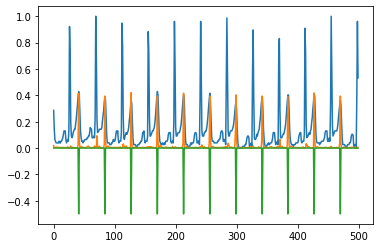

In [6]:
# ----------------------------------- deep learning model training & validation -------------------------------------- #

CNN_UNET = CNN()

CNN_UNET.compile(optimizer='adam', loss=??????????)

cp_callback = tf.keras.callbacks.ModelCheckpoint(CHECKPOINT_PATH, verbose=1, save_best_only=True, save_weights_only=True, period=1)

CNN_UNET.fit(train_ECG, train_mask, epochs=2000, batch_size=10000, shuffle=True, validation_data=(val_ECG, val_mask), verbose=2, callbacks=[cp_callback])

CNN_UNET.load_weights(CHECKPOINT_PATH)
prediction = CNN_UNET.predict(val_ECG)

val_ECG_save = np.reshape(val_ECG, [-1])
val_mask_save = np.reshape(val_mask, [-1])
prediction_save = np.reshape(prediction, [-1])

name = 'ECG_T_CNN_UNET_timesteps_' + str(int(timesteps)) + '_kernel_size_' + str(int(kernel_size)) + '_prediction_results.txt'
file = open(name, 'w')
for result_num in range(int(len(prediction)/10)):
    file.write("%f %f %f \n" % (val_ECG_save[result_num], prediction_save[result_num], val_mask_save[result_num]))
file.close()

plt.figure(figsize=(14,4))
plt.plot(val_ECG_save[:timesteps])
plt.plot(prediction_save[:timesteps])
plt.plot(val_mask_save[:timesteps]*-0.5)
plt.show()